In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the FootwearData.csv file
data = pd.read_csv('FootwearData_cleaned.csv')


<Figure size 1200x600 with 0 Axes>

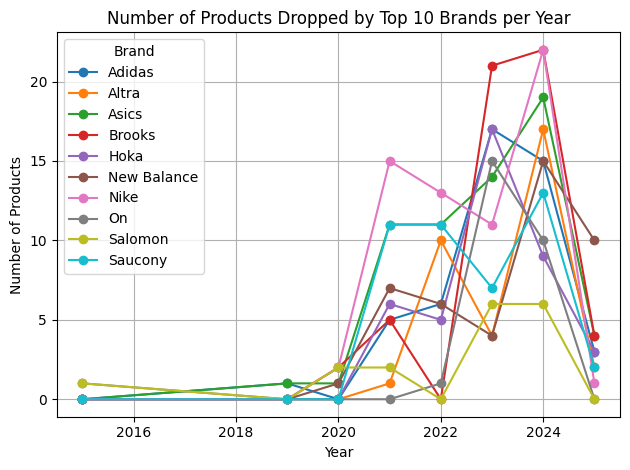

In [19]:
# Take the year from Original Review Date ( Jun 20, 2024) = 2024 and plot a time-series plot, of the number of products each brand dropped per year.
# On the y axis should be # of products, x should be year and this should be a line chart where each brand is grouped together (please only show the top 10 brands with highest number of products)
# Extract the year from the Original Review Date
data['Year'] = pd.to_datetime(data['Original Review Date']).dt.year
# filter by category = Running
data = data[data['Category'] == 'Running']
# Count the number of products per brand per year
brand_year_counts = data.groupby(['Brand', 'Year']).size().reset_index(name='Product Count')
# Get the top 10 brands with the highest number of products
top_brands = brand_year_counts.groupby('Brand')['Product Count'].sum().nlargest(10).index
# Filter the data to include only the top 10 brands
top_brand_year_counts = brand_year_counts[brand_year_counts['Brand'].isin(top_brands)]
# Pivot the data for plotting
pivot_data = top_brand_year_counts.pivot(index='Year', columns='Brand', values='Product Count').fillna(0)
# Plot the data
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='line', marker='o')
plt.title('Number of Products Dropped by Top 10 Brands per Year')
plt.xlabel('Year')
plt.ylabel('Number of Products')
plt.legend(title='Brand')
plt.grid()
plt.tight_layout()
# plt.savefig('top_brands_products_per_year.png')
plt.show()

In [10]:
# Show the products dropped by brookks that are running
# Filter the data for Brooks brand and Running category
brooks_data = data[(data['Brand'] == 'Nike') & (data['Category'] == 'Running')]
# Display the relevant columns
brooks_data = brooks_data[['Product Name', 'Release Date', 'Original Review Date', 'Audience Rating']]
# sort by Original Review Date
brooks_data['Original Review Date'] = pd.to_datetime(brooks_data['Original Review Date'])
brooks_data = brooks_data.sort_values(by='Original Review Date')
# Display the products
print(brooks_data)
# Show the products dropped by nike that are running


               Product Name  Release Date Original Review Date  \
460  Air Zoom Terra Kiger 6      Mar 2020           2020-04-29   
491           Juniper Trail      Aug 2020           2020-08-24   
479   Zoom X Invincible Run  Jan 07, 2021           2021-01-18   
432             Wildhorse 7      Mar 2021           2021-03-09   
208  Zoom X Vaporfly Next 2  Mar 25, 2021           2021-03-13   
..                      ...           ...                  ...   
226     Revolution 7 Easyon           NaN           2024-11-17   
326          Pegasus 41 Gtx           NaN           2024-11-21   
329           Winflo 11 Gtx           NaN           2024-11-24   
357     Pegasus Trail 5 Gtx           NaN           2024-12-14   
26               Zoom Fly 6           NaN           2025-01-15   

     Audience Rating  
460             87.0  
491             79.0  
479             89.0  
432             87.0  
208             91.0  
..               ...  
226             79.0  
326             86.0  


# Simple Feature on X, and Audience Rating on the Y

In [ ]:
from ipywidgets import interact, widgets
import numpy as np

import matplotlib.pyplot as plt

# Filter the data for the "Running" category
running_data = data[data['Category'] == 'Running']

# Define the features to filter on the x-axis
features = [
    'Heel stack (mm)', 'Forefoot stack (mm)', 'Drop (mm)', 
    'Midsole softness (HA)', 'Insole thickness (mm)'
]

# Function to plot the histogram
def plot_histogram(feature):
    if feature not in running_data.columns:
        print(f"Feature '{feature}' not found in the dataset.")
        return
    
    # Drop NaN values for the selected feature and audience rating
    filtered_data = running_data[[feature, 'Audience Rating']].dropna()
    
    if filtered_data.empty:
        print(f"No data available for the selected feature '{feature}'.")
        return
    
    # Create bins from 0 to 100 with equal intervals
    bins = np.linspace(0, 100, 11)
    filtered_data['Bin'] = pd.cut(filtered_data[feature], bins=bins, labels=bins[:-1])
    
    # Calculate the average audience rating for each bin
    bin_avg_ratings = filtered_data.groupby('Bin')['Audience Rating'].mean()
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_avg_ratings.index.astype(float), bin_avg_ratings, width=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of Audience Rating by {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Average Audience Rating', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Create an interactive widget
interact(
    plot_histogram,
    feature=widgets.Dropdown(options=features, description='Feature')
)

interactive(children=(Dropdown(description='Feature', options=('Heel stack (mm)', 'Forefoot stack (mm)', 'Drop…

<function __main__.plot_histogram(feature)>

# Radar Chart 

In [9]:
# Summary Analysis
running_data = data[data['Category'] == 'Running']
features = [
    'Heel stack (mm)', 'Forefoot stack (mm)', 'Drop (mm)', 
    'Midsole softness (HA)', 'Midsole softness in cold (HA)', 
    'Midsole softness in cold (%)', 'Insole thickness (mm)'
]

feature_stats = running_data[features].describe()
print("Feature Ranges:")
print("\nMin values:")
print(feature_stats.loc['min'])
print("\nMax values:")
print(feature_stats.loc['max'])
print("\nMean values:")
print(feature_stats.loc['mean'])

Feature Ranges:

Min values:
Heel stack (mm)                  10.6
Forefoot stack (mm)              10.5
Drop (mm)                        -0.8
Midsole softness (HA)             8.5
Midsole softness in cold (HA)    11.1
Midsole softness in cold (%)      0.0
Insole thickness (mm)             1.5
Name: min, dtype: float64

Max values:
Heel stack (mm)                  46.3
Forefoot stack (mm)              37.1
Drop (mm)                        17.3
Midsole softness (HA)            49.0
Midsole softness in cold (HA)    59.5
Midsole softness in cold (%)     82.0
Insole thickness (mm)             9.8
Name: max, dtype: float64

Mean values:
Heel stack (mm)                  33.617476
Forefoot stack (mm)              25.304854
Drop (mm)                         8.336576
Midsole softness (HA)            21.413712
Midsole softness in cold (HA)    26.541943
Midsole softness in cold (%)     25.137116
Insole thickness (mm)             4.513949
Name: mean, dtype: float64


/var/folders/h_/kz3y2nx170ggjt2rjqm76bg00000gn/T/ipykernel_82359/4183550716.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  running_data['Rating Category'] = pd.cut(
/var/folders/h_/kz3y2nx170ggjt2rjqm76bg00000gn/T/ipykernel_82359/4183550716.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radar_data = running_data.groupby(['Strike Pattern', 'Pace', 'Rating Category'])[features].mean().reset_index()


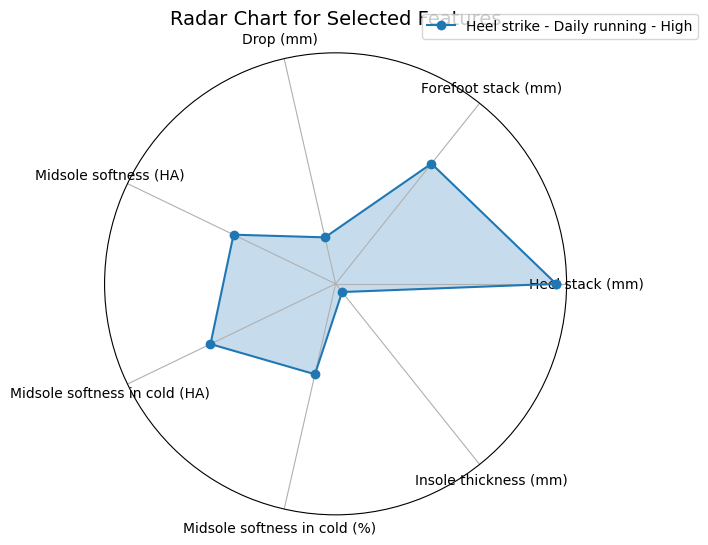

In [10]:
# Print the number of different Pace types we have in our data (Strike Pattern, Pace)
# Please also include a filter for Audience Rating where we create categories i.e. Low Rating <80, Medium Rating 80-90, High Rating >90
# Create a Radar Chart with a filter by data["Pace"], With Filter's To Select Strike Pattern Pace, and our Audience Rating (Low, Medium, High) 
# Let's average these features for our radar chart:  Heel stack (mm)	Forefoot stack (mm)	Drop (mm)	Midsole softness (HA)	Midsole softness in cold (HA)	Midsole softness in cold (%)	Insole thickness (mm)
running_data = data[data['Category'] == 'Running']
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the features for the radar chart
features = [
    'Heel stack (mm)', 'Forefoot stack (mm)', 'Drop (mm)', 
    'Midsole softness (HA)', 'Midsole softness in cold (HA)', 
    'Midsole softness in cold (%)', 'Insole thickness (mm)'
]

# Create categories for Audience Rating
running_data['Rating Category'] = pd.cut(
    running_data['Audience Rating'], 
    bins=[0, 80, 90, 100], 
    labels=['Low', 'Medium', 'High']
)

# Group by Strike Pattern, Pace, and Rating Category, and calculate the mean for the selected features
radar_data = running_data.groupby(['Strike Pattern', 'Pace', 'Rating Category'])[features].mean().reset_index()

# Select a specific combination for visualization (e.g., Heel strike, Daily running, High rating)
selected_data = radar_data[
    (radar_data['Strike Pattern'] == 'Heel strike') & 
    (radar_data['Pace'] == 'Daily running') & 
    (radar_data['Rating Category'] == 'High')
]

# Prepare data for the radar chart
if not selected_data.empty:
    values = selected_data[features].iloc[0].values
    values = np.append(values, values[0])  # Close the radar chart loop
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, marker='o', label='Heel strike - Daily running - High')
    ax.fill(angles, values, alpha=0.25)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.set_title('Radar Chart for Selected Features', fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()
else:
    print("No data available for the selected combination.")

# Filter the data for Running category
# running_data = data[data['Category'] == 'Running']

# The values we should be looking at are these columns

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

# Load your dataset (adjust path as needed)
data = pd.read_csv("FootwearData_cleaned.csv")

# Filter for running shoes only
running_data = data[data['Category'] == 'Running'].copy()

# Create Audience Rating Category
running_data['Rating Category'] = pd.cut(
    running_data['Audience Rating'], 
    bins=[0, 80, 90, 100], 
    labels=['Low', 'Medium', 'High']
)

# Define features to use in radar chart
features = [
    'Heel stack (mm)', 'Forefoot stack (mm)', 'Drop (mm)', 
    'Midsole softness (HA)',  'Insole thickness (mm)'
]

# Group by filters and average features
radar_data = running_data.groupby(
    ['Strike Pattern', 'Pace', 'Rating Category']
)[features].mean().reset_index()

# Radar Chart Function
def plot_radar_chart(strike_pattern, pace, rating_category):
    selected = radar_data[
        (radar_data['Strike Pattern'] == strike_pattern) &
        (radar_data['Pace'] == pace) &
        (radar_data['Rating Category'] == rating_category)
    ]
    
    if selected.empty:
        print("⚠️ No data available for this combination.")
        return

    values = selected[features].iloc[0].values
    values = np.append(values, values[0])  # close the loop
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    # Plot radar chart
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='blue', linewidth=2, marker='o')
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.set_title(f"{strike_pattern} - {pace} - {rating_category} Rating", fontsize=14)
    plt.show()

# Create dropdown widgets from available values
strike_patterns = sorted(running_data['Strike Pattern'].dropna().unique())
paces = sorted(running_data['Pace'].dropna().unique())
rating_categories = ['Low', 'Medium', 'High']

# Display interactive chart
interact(
    plot_radar_chart,
    strike_pattern=widgets.Dropdown(options=strike_patterns, description='Strike Pattern'),
    pace=widgets.Dropdown(options=paces, description='Pace'),
    rating_category=widgets.Dropdown(options=rating_categories, description='Rating')
)

/var/folders/h_/kz3y2nx170ggjt2rjqm76bg00000gn/T/ipykernel_82359/594463005.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radar_data = running_data.groupby(


interactive(children=(Dropdown(description='Strike Pattern', options=('Forefoot/Midfoot strike', 'Heel strike'…

<function __main__.plot_radar_chart(strike_pattern, pace, rating_category)>